In [8]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
#read the data
df_train = pd.read_csv('train.csv')

In [13]:
df_train[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


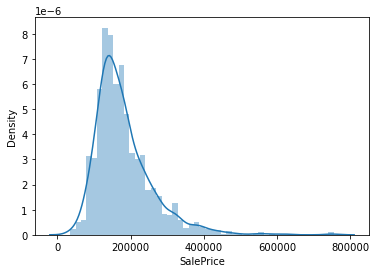

In [14]:
sns.distplot(df_train['SalePrice']);

In [17]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Skewness: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Skewness: 6.536281860064529


### Değişkenler
* SalePrice vs GrLivArea (yaşam alanı m2)
* SalePrice vs TotalBsmtSF (bodrum alanı m2)
* SalePrice vs OverallQual (kullanılan malzeme)
* SalePrice vs YearBuilt (yapım yılı)

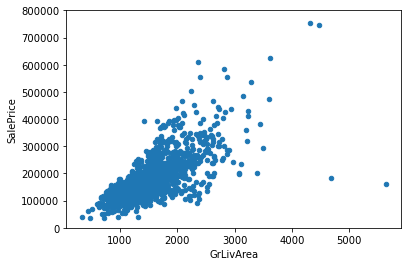

In [18]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

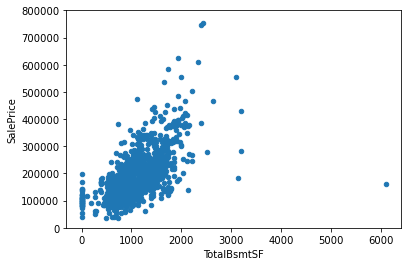

In [19]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

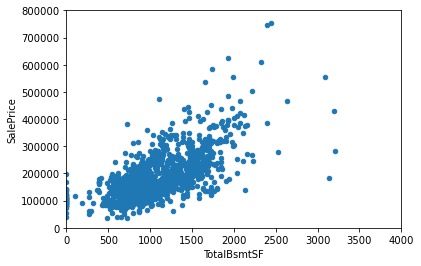

In [20]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), xlim=(0,4000));

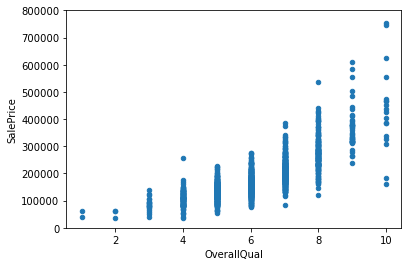

In [21]:
#scatter plot OverallQual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

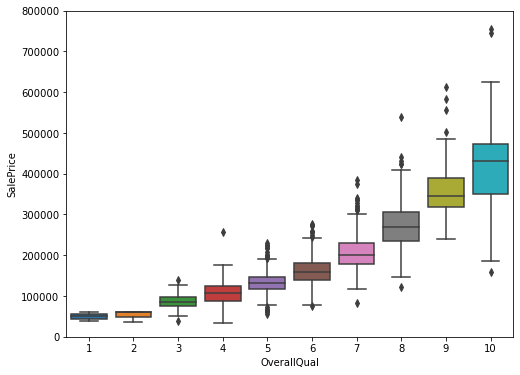

In [22]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

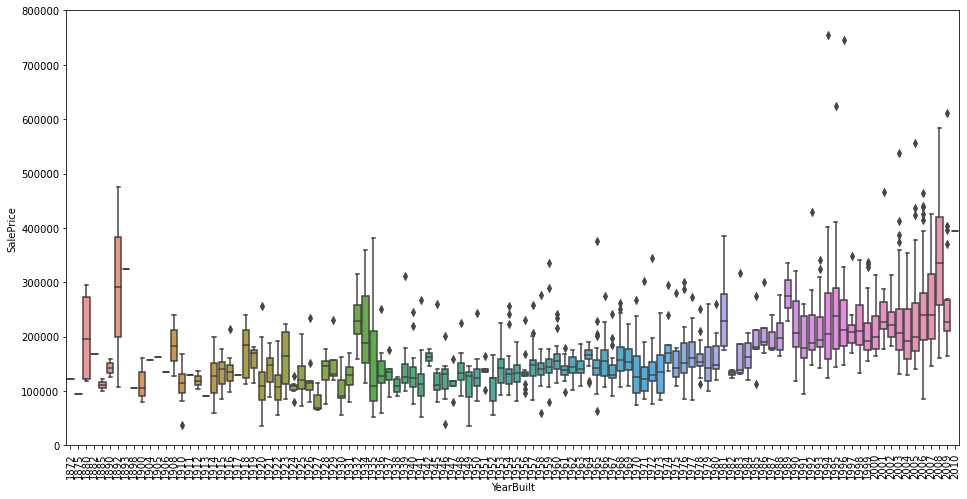

In [23]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

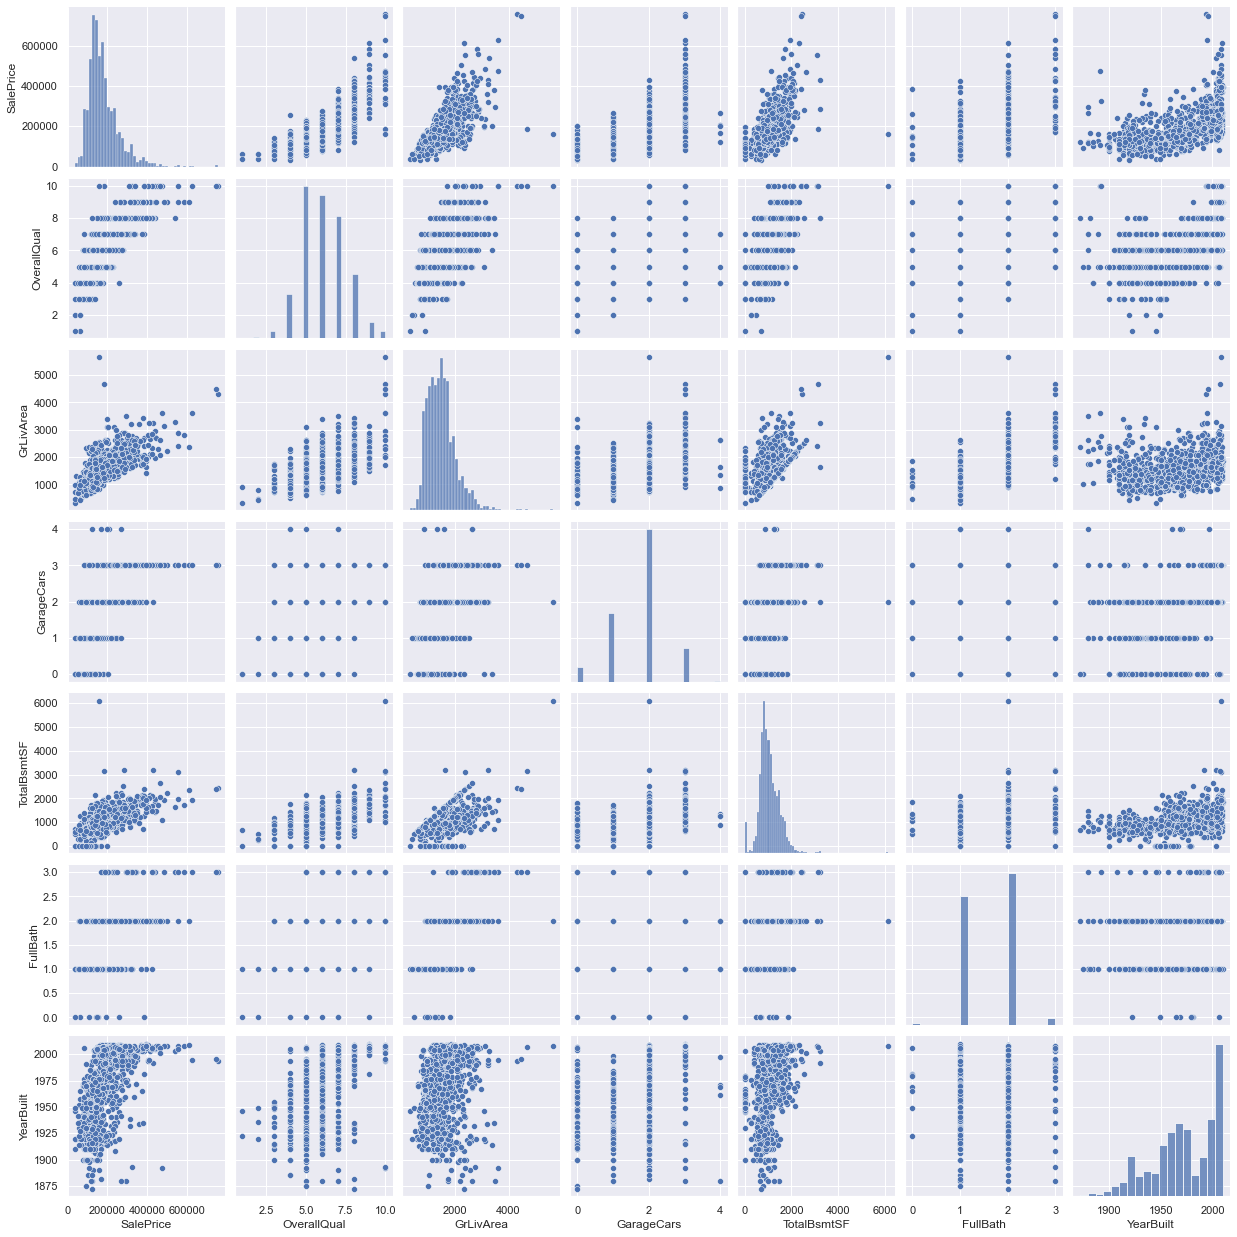

In [30]:
#pairplot (scatterplot style)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

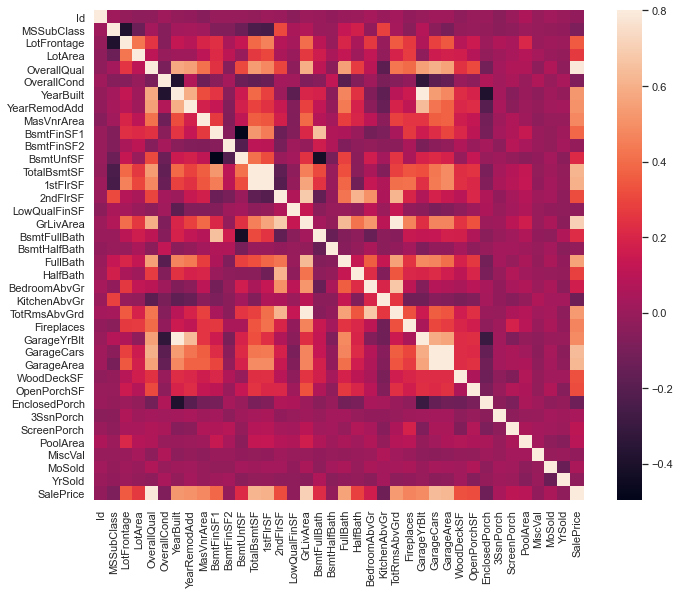

In [31]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

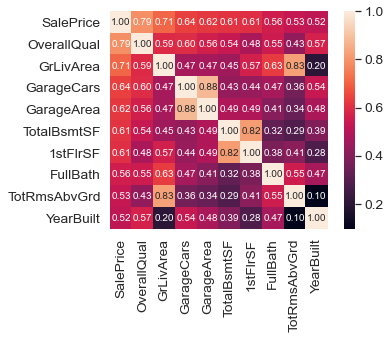

In [34]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [39]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [40]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

### MinMax Scaling :  
* Verinin 0 ile 1 arasında değerler aldığı bir durumdur. Burada dağılım, verinin dağılımı ile benzerdir. Burada ‘outlier’ denilen dışta kalan verilere karşı hassasiyet durumu vardır, bu yüzden bu değerlerin fazla olduğu bir durumda iyi bir performans gösteremeyebilir.

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df_train['SalePrice'][:,np.newaxis])
df_sc = pd.DataFrame(scaled_df)
df_sc

,0
0,0.241078
1,0.203583
2,0.261908
3,0.145952
4,0.298709
...,...
1454,0.194556
1455,0.243161
1456,0.321622
1457,0.148903


### Robust Scaler, 
* Normalizasyon ile benzer şekilde çalışır. Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir. Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. kartil aralığına oturtulur.

In [43]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_df_r = robust_scaler.fit_transform(df_train['SalePrice'][:,np.newaxis])
df_sc_r = pd.DataFrame(scaled_df_r)
df_sc_r

,0
0,0.541344
1,0.220107
2,0.719810
3,-0.273647
4,1.035098
...,...
1454,0.142772
1455,0.559191
1456,1.231410
1457,-0.248364


### MaxAbs Scaler
* Her özelliğin maksimum mutlak değeri 1 olacak şekilde her özelliği ayrı ayrı ölçeklendirir ve dönüştürülür.

In [44]:
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()
scaled_df_mx = max_scaler.fit_transform(df_train['SalePrice'][:,np.newaxis])
df_sc_mx = pd.DataFrame(scaled_df_mx)
df_sc_mx

,0
0,0.276159
1,0.240397
2,0.296026
3,0.185430
4,0.331126
...,...
1454,0.231788
1455,0.278146
1456,0.352980
1457,0.188245


### PowerTransformer

* Varyansı stabilize etmek ve çarpıklığı en aza indirmek için en uygun ölçeklendirme faktörünü bulur. Yine ortalama değerin 0, standart sapmanın ise 1 değerini aldığı bir metoddur.

In [47]:
from sklearn.preprocessing import PowerTransformer

transform_power = PowerTransformer()
scaled_df_pt = transform_power.fit_transform(df_train['SalePrice'][:,np.newaxis])
df_sc_pt = pd.DataFrame(scaled_df_pt)
df_sc_pt

,0
0,0.570981
1,0.227572
2,0.741636
3,-0.425218
4,1.014964
...,...
1454,0.136655
1455,0.588632
1456,1.169819
1457,-0.386981


In [54]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.08489782]
 [3.13524919]
 [3.22530263]
 [3.24577046]
 [3.26112763]
 [3.33994012]
 [3.41155236]
 [3.57582371]
 [3.59470548]
 [3.70170215]
 [3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [52]:
saleprice_scaled[:,0].argsort()

array([ 495,  916,  968, ..., 1169, 1182,  691], dtype=int64)